In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import time

In [3]:
data = pd.read_csv('./cause_of_deaths.csv')
data

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2014,1,15,5,2,0,4,4,0,9,...,50,32,0,2,6,9,11,21,2,0
205,2015,1,16,5,3,0,4,4,0,9,...,51,34,0,3,6,10,12,22,2,0
206,2016,1,16,5,3,0,4,4,0,8,...,52,35,0,3,6,10,12,22,2,0
207,2017,1,16,5,3,0,4,4,0,8,...,54,35,0,3,6,10,12,23,2,0


In [4]:
from sklearn.metrics import silhouette_score

models = []
score1 = []
score2 = []
timeKMeans = time.time()
for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=123, init="k-means++").fit(data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data, model.labels_))
timeKMeans = time.time() - timeKMeans

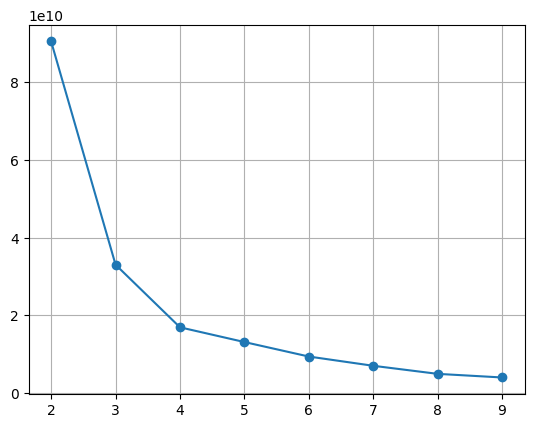

In [5]:
plt.grid()
plt.plot(np.arange(2,10), score1, marker="o")
plt.show()

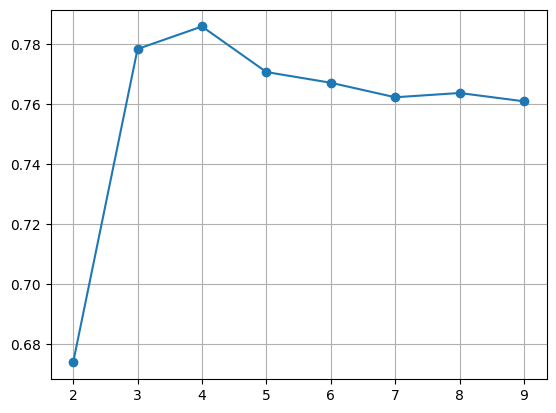

In [6]:
plt.grid()
plt.plot(np.arange(2,10), score2, marker="o")
plt.show()

In [7]:
model1 = KMeans(n_clusters=4, random_state=123, init='k-means++')
model1.fit(data)
model1.cluster_centers_

array([[2.00437815e+03, 1.16974790e+01, 1.48890756e+02, 4.04117647e+01,
        5.99159664e+00, 1.81898940e-12, 2.21260504e+01, 4.59831933e+01,
        2.31932773e+00, 3.42857143e+00, 5.37815126e+00, 5.32773109e+00,
        2.37011765e+03, 2.34193277e+02, 1.35176471e+02, 5.34453782e+00,
        4.17563025e+01, 1.42016807e+00, 7.07563025e+00, 1.58823529e+00,
        9.40605042e+02, 1.81176471e+01, 5.45798319e+01, 7.64453782e+01,
        4.26890756e+00, 5.60504202e+00, 7.66806723e+01, 2.04344538e+02,
        7.95714286e+01, 1.37394958e+02, 5.83193277e+00, 6.21848739e-01],
       [2.00450000e+03, 2.62220000e+03, 1.39993333e+03, 4.46566667e+02,
        2.38176667e+03, 4.64133333e+02, 1.88453333e+03, 3.60760000e+03,
        4.32070000e+03, 1.42733333e+02, 2.36466667e+02, 4.92123333e+03,
        5.35680667e+04, 2.74059667e+04, 2.32511333e+04, 1.08566667e+02,
        1.23513333e+03, 5.59000000e+02, 8.19440000e+03, 7.29000000e+01,
        1.56537000e+04, 9.35066667e+03, 3.10690000e+03, 4.48920

In [8]:
labels = model1.labels_
data['Cluster'] = labels
data['Cluster'].value_counts()

0    119
1     30
3     30
2     30
Name: Cluster, dtype: int64

In [9]:
fig = go.Figure(data=[go.Scatter3d(x=data["Year"], y=data["Diabetes Mellitus"], z=data["Parkinson's Disease"], marker_color=data['Cluster'], mode='markers', marker_size=3)])
fig.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering


timeAgglomerative = time.time()
model2 = AgglomerativeClustering(4, compute_distances=True)
clastering = model2.fit(data)
timeAgglomerative = time.time() - timeAgglomerative

data['Cluster'] = clastering.labels_

fig = go.Figure(data = [go.Scatter3d(x=data['Year'], y=data['Diabetes Mellitus'], z=data['Parkinson\'s Disease'], 
                                   marker_color=data['Cluster'], mode='markers', marker_size=4)])

fig.show()

In [11]:
from sklearn.cluster import DBSCAN

timeDBSCAN = time.time()
model3 = DBSCAN(eps = 11, min_samples = 5).fit(data)
timeDBSCAN = time.time() - timeDBSCAN
data['Cluster'] = model3.labels_

fig = go.Figure(data = [go.Scatter3d(x=data['Year'], y=data['Diabetes Mellitus'], z=data['Parkinson\'s Disease'], 
                                   marker_color=data['Cluster'], mode='markers', marker_size=4)])

fig.show()

In [12]:
df = {
    "K-means, ms" : [round(timeKMeans*1000, 2)],
    "Agglomerative, ms": [round(timeAgglomerative*1000, 2)],
    "DBSCAN, ms": [round(timeDBSCAN*1000, 2)]
}
pd.DataFrame.from_dict(df)

,"K-means, ms","Agglomerative, ms","DBSCAN, ms"
0,397.0,62.0,6.0
